In [1]:
import requests
import bs4
import time
import random

In [2]:
my_headers={"referer": "https://www.coupang.com/np/categories/393760",
     "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

In [23]:
total_data_list=[]
for page_number in range (1,10):
    url="https://www.coupang.com/np/categories/437835?channel=plp_C2&page={}".format(page_number)
    res = requests.get(url=url, headers=my_headers)
    
    soup=bs4.BeautifulSoup(res.text)
    
    div_elements =soup.select("dd.descriptions > div.name")
    for e in div_elements:
        div_elements = e
        data_list=[]
        data_list.append(div_elements.text.strip())
        total_data_list.append(data_list)
    time.sleep(1)

In [4]:
total_data_list

[['창억 부드럽고 쫄깃한 호박인절미 (냉동), 500g, 2팩'],
 ['미미스상회 오메기떡 (냉동), 60g, 20개'],
 ['해찬미소 귀리 찹쌀떡 (냉동), 40g, 30입'],
 ['해찬미소 모싯잎 오쟁이떡 (냉동), 40g, 50입'],
 ['창억 포근하고 담백한 동부찰떡 (냉동), 500g, 2팩'],
 ['창억 입안가득 포근한 통팥찰떡 (냉동), 500g, 2팩'],
 ['블루탐 오메기떡 (냉동), 60g, 40개'],
 ['떡편 감사세트 2호 (냉동), 1세트'],
 ['청년떡집 뉴욕 치즈케익 크림떡 (냉동), 360g, 1개'],
 ['시루조아 굳지않는 흰 앙꼬절편 (냉동), 70g, 20개'],
 ['떡편 수수팥경단 (냉동), 1kg, 1개'],
 ['떡편 현미가래떡 (냉동), 40g, 15개입'],
 ['창억 입안가득 고소한 녹두깨찰떡 (냉동), 500g, 2팩'],
 ['창억떡 무지개설기 10입 (냉동), 500g, 2팩'],
 ['떡편 합격자신감 찹쌀떡 3종 (냉동), 1세트'],
 ['떡편 감사세트 1호 24개입 (냉동), 1세트'],
 ['미미스상회 앙버터 콩쑥개떡 (냉동), 60g, 15개'],
 ['신라명과 한입빵떡 딸기크림 (냉동), 600g, 1팩'],
 ['끼리 블루베리 크림치즈 찰떡 (냉동), 60g, 9개입'],
 ['유기방아 현미가래떡 (냉동), 1kg, 1개'],
 ['끌레도르 아이스크림 선물세트 바 90ml x 12p + 파인트 474ml x 2p (냉동), 1박스'],
 ['창억떡 동부설기 10입 (냉동), 500g, 2팩'],
 ['떡편 백일 상차림 떡 + 백일 토퍼 세트 2.4kg (냉동), 1세트'],
 ['청년떡집 딸기 크림떡 (냉동), 60g, 6개'],
 ['소부당 흑임자 인절미 (냉동), 250g, 4팩'],
 ['시루조아 굳지않는 쑥 절편 (냉동), 1.4kg, 1개'],
 ['끼리 크림치즈 찰떡 스트로베리 (냉동), 60g, 9개입'],
 ['청년떡집 티라미슈 크림떡 (냉동), 40g, 15개']

In [11]:
import pandas as pd
df=pd.DataFrame(total_data_list)

In [12]:
df.to_csv('wordtext4-2.txt',index=False)

In [13]:
from konlpy.tag import Twitter 
from collections import Counter

In [14]:
file = open('wordtext4-2.txt', 'r', encoding="UTF-8")

lists = file.readlines()

file.close()

#lists

In [15]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

[[('0', 'Number'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('창', 'Noun'), ('억', 'Suffix'), ('부드럽고', 'Adjective'), ('쫄깃', 'Noun'), ('한', 'Josa'), ('호박', 'Noun'), ('인절미', 'Noun'), ('(', 'Punctuation'), ('냉동', 'Noun'), ('),', 'Punctuation'), ('500', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('2', 'Number'), ('팩', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('미', 'Adjective'), ('미스', 'Noun'), ('상회', 'Noun'), ('오메', 'Noun'), ('기', 'Modifier'), ('떡', 'Noun'), ('(', 'Punctuation'), ('냉동', 'Noun'), ('),', 'Punctuation'), ('60', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('20', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('해찬', 'Noun'), ('미소', 'Noun'), ('귀리', 'Noun'), ('찹쌀떡', 'Noun'), ('(', 'Punctuation'), ('냉동', 'Noun'), ('),', 'Punctuation'), ('40', 'Number'), ('g', 'Alpha'), (',', 'Punctuation'), ('30', 'Number'), ('입', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('해찬', 

In [16]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("입" not in word)and("세트" not in word)and("팩" not in word)and("산" not in word)and("것" not in word)and("냉동" not in word)and("개" not in word)and("냉장" not in word)and("용" not in word)and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['창', '쫄깃', '호박', '인절미', '미스', '상회', '오메', '떡', '해찬', '미소', '귀리', '찹쌀떡', '해찬', '미소', '모싯잎', '오', '떡', '창', '동부', '찰떡', '창', '가득', '통팥', '찰떡', '블루', '오메', '떡', '떡편', '감사', '호', '청년', '떡집', '뉴욕', '치즈', '케익', '크림', '떡', '시루', '앙꼬', '절편', '떡편', '팥', '경단', '떡편', '현미', '가래떡', '창', '가득', '녹두', '깨', '찰떡', '창', '떡', '설기', '떡편', '합격', '자신감', '찹쌀떡', '종', '떡편', '감사', '호', '미스', '상회', '버터', '콩쑥', '떡', '신라', '명과', '딸기', '크림', '끼리', '블루베리', '크림', '치즈', '찰떡', '유기', '방아', '현미', '가래떡', '끌레도르', '아이스크림', '선물', '바', '파인트', '박스', '창', '떡', '동부', '설기', '떡편', '백일', '상차림', '떡', '백일', '토퍼', '청년', '떡집', '딸기', '크림', '떡', '부당', '흑임자', '인절미', '시루', '쑥', '절편', '끼리', '크림', '치즈', '찰떡', '스트로베리', '청년', '떡집', '티라미슈', '크림', '떡', '루아', '찹쌀떡', '포장', '시루', '가래떡', '견과', '찰떡', '찌', '송편', '떡편', '영양', '밥', '창', '떡', '팥', '설기', '블루', '오메', '떡', '혼합', '해찬', '미소', '귀리', '인절미', '창', '떡', '창', '기쁨', '선물', '떡', '식혜', '쿠치', '떡', '스틱', '크림', '찹쌀떡', '쑥찰', '인절미', '부림', '떡', '전문점', '의령', '자연', '잎', '망', '떡', '청년', '떡집', '흑심', '떡', '아우', '인

In [17]:
count = Counter(noun_adj_adv_list)

In [18]:
words = dict(count.most_common())

In [19]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [20]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = 'C:/Users/win10/workspace/font/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


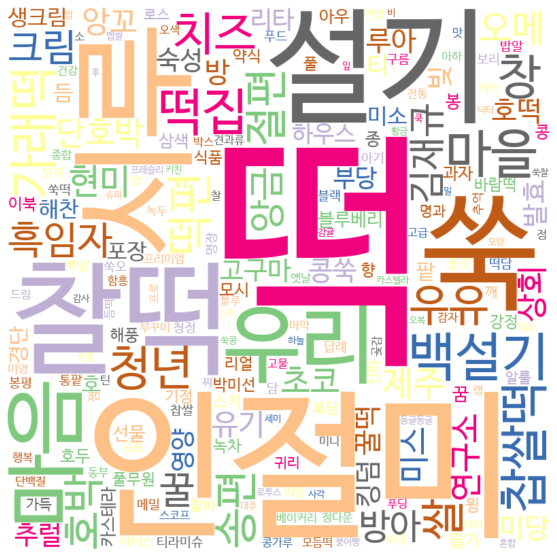

In [22]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')